<a href="https://colab.research.google.com/github/ayushiiii28/Meta-Scifor/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout
)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [6]:
# Reshape images to include the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [5]:
# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [7]:
# Initialize the model
model = Sequential()

# 1. First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# 2. First Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 4. Second Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5. Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# 6. Fourth Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))

# 7. Flatten the output
model.add(Flatten())

# 8. First Fully Connected Layer
model.add(Dense(128, activation='relu'))

# 9. Second Fully Connected Layer
model.add(Dense(50, activation='relu'))

# 10. Third Fully Connected Layer
model.add(Dense(50, activation='relu'))

# 11. Output Layer
model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,246 (1.64 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Define training parameters
epochs = 10
batch_size = 128

# Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    verbose=1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 188ms/step - accuracy: 0.7752 - loss: 0.6919 - val_accuracy: 0.9733 - val_loss: 0.0897
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 185ms/step - accuracy: 0.9783 - loss: 0.0705 - val_accuracy: 0.9863 - val_loss: 0.0480
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 77s 183ms/step - accuracy: 0.9854 - loss: 0.0452 - val_accuracy: 0.9863 - val_loss: 0.0513
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 182ms/step - accuracy: 0.9888 - loss: 0.0342 - val_accuracy: 0.9878 - val_loss: 0.0398
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 187ms/step - accuracy: 0.9925 - loss: 0.0251 - val_accuracy: 0.9892 - val_loss: 0.0357
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 103s 236ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9918 - val_loss: 0.0346
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 189ms/step - accuracy: 0.9941 - loss: 0.0193 - val_accuracy: 0.9907 - val_loss: 0.0319
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 191ms/step - accuracy: 0.9950 - loss: 

In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 99.11%


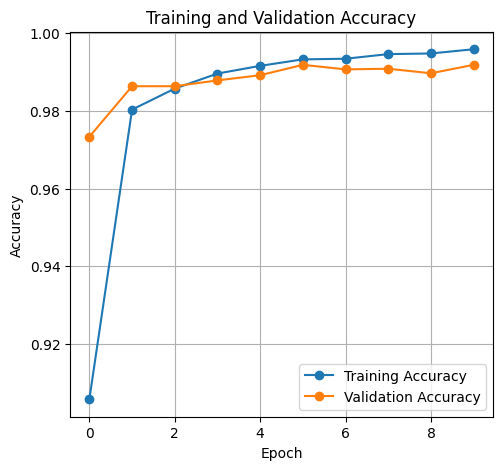

In [17]:
# Plot Training & Validation Accuracy and Loss

# Accuracy Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

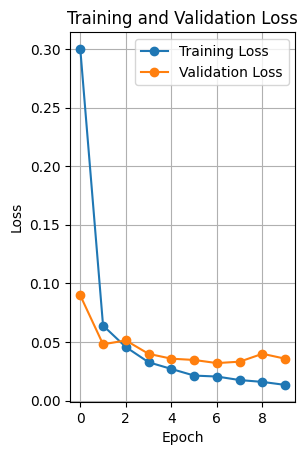

In [18]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>